In [2]:
# Import necessaru libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime


In [3]:
irra = pd.read_csv("New York Solar1.csv")

irra.head()

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Wind Speed,Relative Humidity,Temperature,Pressure,GHI_DAY_AHEAD
0,2019,1,1,0,0,0,0,8,4.6,95.61,5.9,1017,0
1,2019,1,1,1,0,0,0,7,4.9,95.70,6.4,1015,0
2,2019,1,1,2,0,0,0,6,4.3,96.75,6.7,1013,0
3,2019,1,1,3,0,0,0,6,4.1,97.53,7.1,1011,0
4,2019,1,1,4,0,0,0,6,3.9,98.02,7.7,1008,0


In [4]:
irra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               26304 non-null  int64  
 1   Month              26304 non-null  int64  
 2   Day                26304 non-null  int64  
 3   Hour               26304 non-null  int64  
 4   Minute             26304 non-null  int64  
 5   GHI                26304 non-null  int64  
 6   Clearsky GHI       26304 non-null  int64  
 7   Cloud Type         26304 non-null  int64  
 8   Wind Speed         26304 non-null  float64
 9   Relative Humidity  26304 non-null  float64
 10  Temperature        26304 non-null  float64
 11  Pressure           26304 non-null  int64  
 12  GHI_DAY_AHEAD      26304 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 2.6 MB


In [5]:
irra.describe()

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Wind Speed,Relative Humidity,Temperature,Pressure,GHI_DAY_AHEAD
count,26304.00000,26304.000000,26304.000000,26304.000000,26304.0,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000
mean,2020.00000,6.521898,15.732664,11.500000,0.0,160.114279,230.465823,3.330786,2.467180,80.742023,12.272822,1015.341165,160.114279
std,0.81614,3.449052,8.801537,6.922318,0.0,246.408752,301.620801,3.046652,1.207075,15.004305,9.647457,7.629226,246.408752
min,2019.00000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.100000,28.450000,-16.100000,976.000000,0.000000
25%,2019.00000,4.000000,8.000000,5.750000,0.0,0.000000,0.000000,0.000000,1.600000,70.510000,4.100000,1010.000000,0.000000
50%,2020.00000,7.000000,16.000000,11.500000,0.0,5.000000,9.000000,4.000000,2.300000,83.810000,12.200000,1015.000000,5.000000
75%,2021.00000,10.000000,23.000000,17.250000,0.0,252.250000,454.000000,7.000000,3.100000,93.480000,20.800000,1020.000000,252.250000
max,2021.00000,12.000000,31.000000,23.000000,0.0,1016.000000,1016.000000,9.000000,10.300000,100.000000,33.500000,1040.000000,1016.000000


In [6]:
# Convert mbar to Hg
irra["Pressure"] = irra["Pressure"].apply(lambda x: round(x*0.02953,1))

**EDA**

[Text(0.5, 1.0, 'Feature Correlation')]

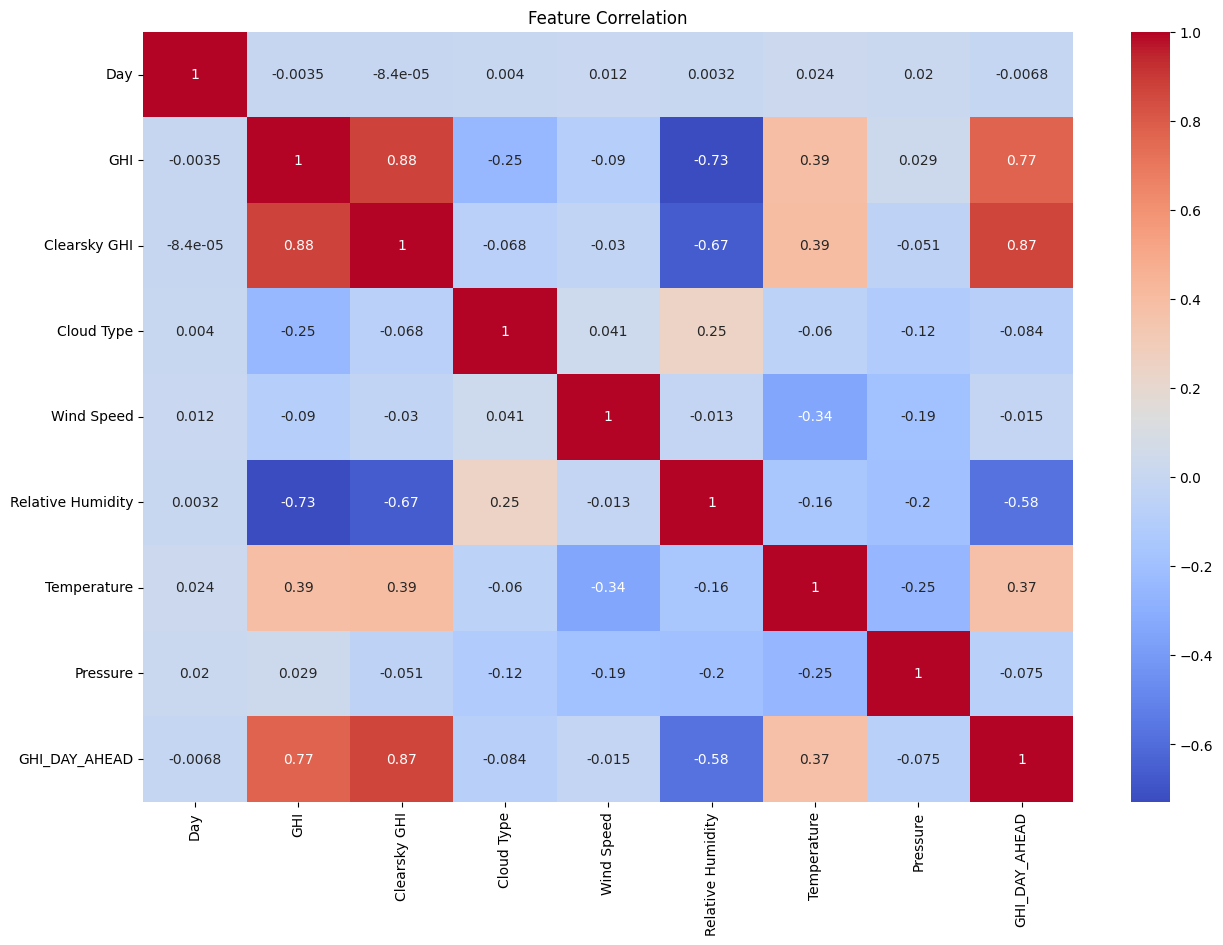

In [7]:
# Setting plot size
plt.subplots(figsize=(15,10))

# Created correlation heatmap
sns.heatmap(irra.drop(['Month','Hour','Minute','Year'],axis=1).corr(), annot=True,cmap='coolwarm').set(title = 'Feature Correlation')

In [8]:
# Create new dataset based on groupby of 'Hour' and 'Month' respectively
day_h = irra.groupby('Hour').mean().reset_index()
day_m = irra.groupby('Month').mean().reset_index()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_34044\1302150227.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='GHI', data=day_h, palette='rocket_r', ax=axs[0])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_34044\1302150227.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Temperature', data=day_h, palette='rocket_r', ax=axs[1])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_34044\1302150227.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Relative Humidity', data=day_h, palette

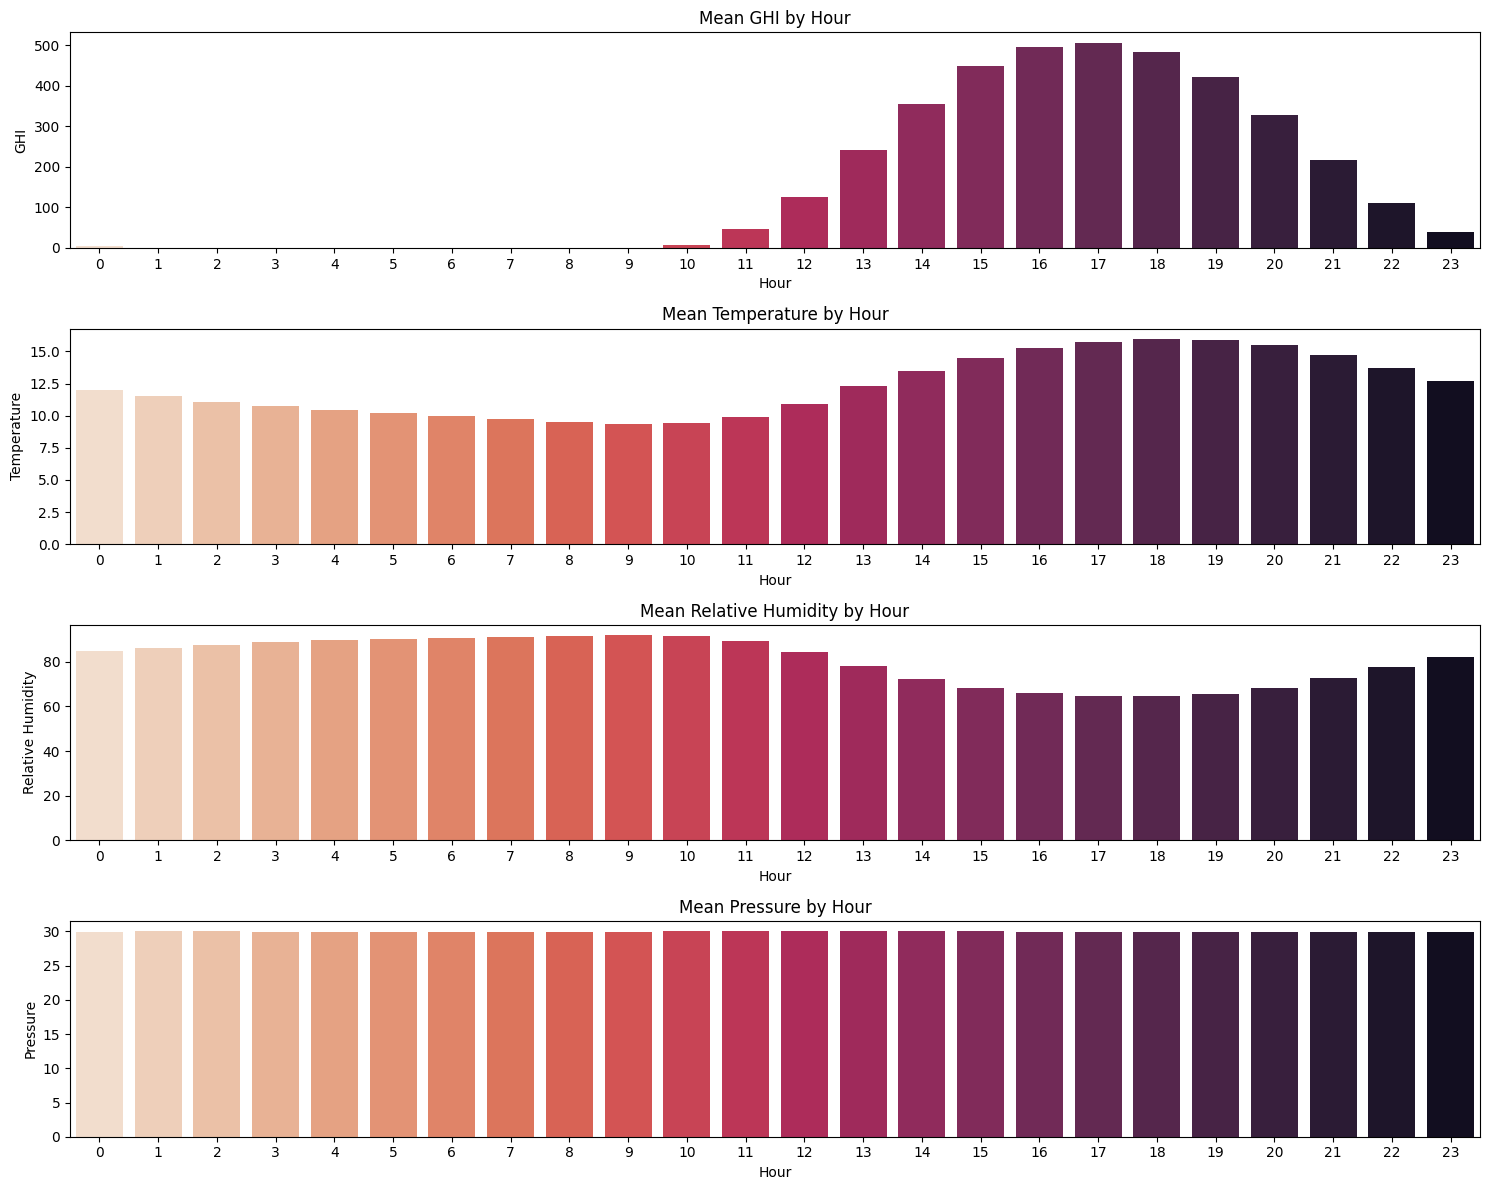

In [9]:
fig, axs = plt.subplots(4, 1, figsize=(15,12))
axs[0].set_title('Mean GHI by Hour')
axs[1].set_title('Mean Temperature by Hour')
axs[2].set_title('Mean Relative Humidity by Hour')
axs[3].set_title('Mean Pressure by Hour')

sns.barplot(x='Hour', y='GHI', data=day_h, palette='rocket_r', ax=axs[0])
sns.barplot(x='Hour', y='Temperature', data=day_h, palette='rocket_r', ax=axs[1])
sns.barplot(x='Hour', y='Relative Humidity', data=day_h, palette='rocket_r', ax=axs[2])
sns.barplot(x='Hour', y='Pressure', data=day_h, palette='rocket_r', ax=axs[3])

plt.tight_layout()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_34044\1006761234.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='GHI', data=day_m, palette='rocket_r', ax=axs[0])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_34044\1006761234.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Temperature', data=day_m, palette='rocket_r', ax=axs[1])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_34044\1006761234.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Relative Humidity', data=day_m, pale

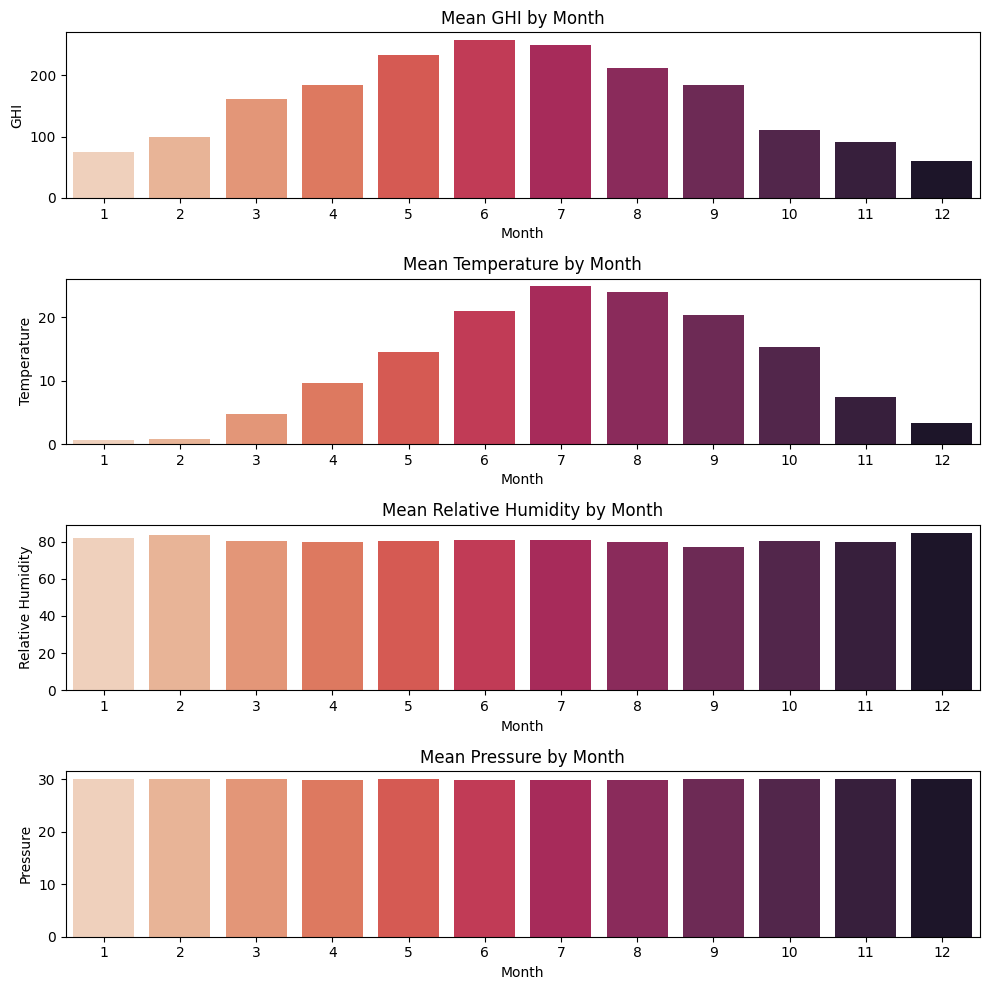

In [10]:
fig, axs = plt.subplots(4, 1, figsize=(10,10))
axs[0].set_title('Mean GHI by Month')
axs[1].set_title('Mean Temperature by Month')
axs[2].set_title('Mean Relative Humidity by Month')
axs[3].set_title('Mean Pressure by Month')

sns.barplot(x='Month', y='GHI', data=day_m, palette='rocket_r', ax=axs[0])
sns.barplot(x='Month', y='Temperature', data=day_m, palette='rocket_r', ax=axs[1])
sns.barplot(x='Month', y='Relative Humidity', data=day_m, palette='rocket_r', ax=axs[2])
sns.barplot(x='Month', y='Pressure', data=day_m, palette='rocket_r', ax=axs[3])

plt.tight_layout()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(irra[['Temperature', 'Pressure', 'Relative Humidity', 'Wind Speed', 'Day', 'Month','Clearsky GHI','Cloud Type']], irra.GHI, test_size=0.25)

In [13]:
# Creating model instance and performing cross validation
lr = LinearRegression()

crs = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
print('Average R2:', crs.mean())

Average R2: 0.8329220682450984


In [14]:
rf = RandomForestRegressor()

crs = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print('Average R2:', crs.mean())

Average R2: 0.9567841229526038


In [15]:
gb = GradientBoostingRegressor()

crs = cross_val_score(gb, X_train, y_train, cv=5, scoring='r2')
print('Average R2:', crs.mean())

Average R2: 0.9497740406367772


In [16]:
# Created simple reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [17]:
# Library imports for hyperparameter tuning
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

rf = RandomForestRegressor(random_state = 1)
param_grid =  {'n_estimators': [100,500], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,None],
                                  'max_features': ['sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
rf_par = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 50, cv = 5, verbose = 1)
best_rf = rf_par.fit(X_train,y_train)
clf_performance(best_rf,'Random Forest')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Forest
Best Score: 0.9583857203208238
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [18]:
# Using best parameter, refine hyperparameters even more.
rf = RandomForestRegressor(random_state = 1)
param_grid =  {'n_estimators': [200],
                                  'bootstrap': [True],
                                  'max_depth': [50],
                                  'max_features': ['sqrt'],
                                  'min_samples_leaf': [2],
                                  'min_samples_split': [2]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = 1, refit = True)
best_clf_rf = clf_rf.fit(X_train, y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Random Forest
Best Score: 0.9547897485711891
Best Parameters: {'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


MAE: 20.21891119221411
RMSE: 49.56116056292752
R2_Score: 0.9590545914136984


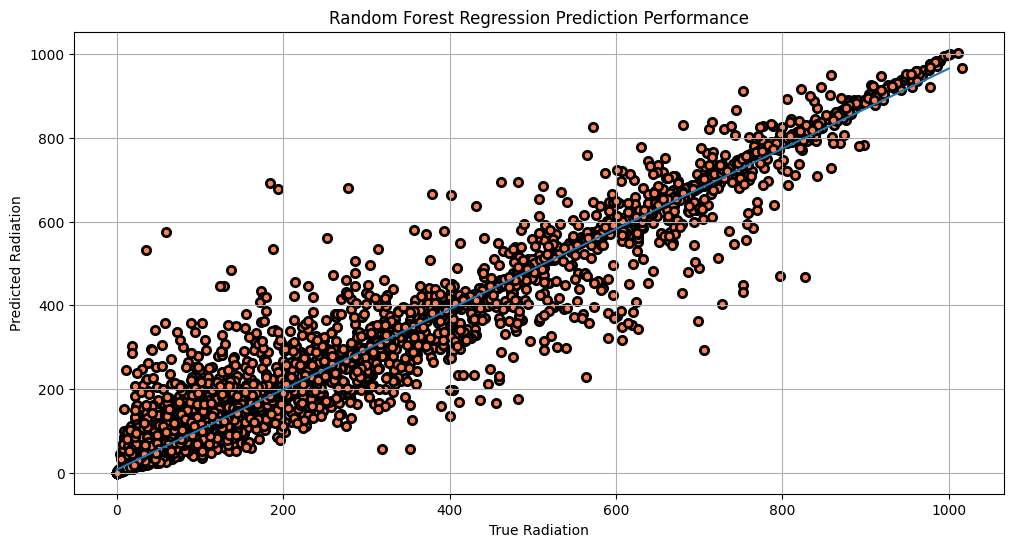

In [20]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Reporting metrics
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('R2_Score:', r2_score(y_test, rf_pred))

# Created scatter plot of true Vs. predicted radiation
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True Radiation') 
plt.ylabel('Predicted Radiation') 
plt.title('Random Forest Regression Prediction Performance') 
plt.grid()

m, b = np.polyfit(y_test,rf_pred,1)
x = np.arange(y_test.min(),y_test.max(),50)
plt.plot(x,m*x+b)

In [21]:
lab = irra[['GHI']].copy()
lab['Predicted GHI'] = best_clf_rf.predict(irra[['Temperature', 'Pressure', 'Relative Humidity', 'Wind Speed', 'Day', 'Month','Clearsky GHI','Cloud Type']])

In [22]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d

output_notebook() 
p = figure(width=800, 
           height=400,
           title="Solar Irradiance Predictions",
           x_axis_label='Date and Time',
           y_axis_label='Solar Irradiance',
           x_axis_type="datetime")
p.x_range = Range1d(lab.index[0], lab.index[600])
p.y_range = Range1d(-100, 1800, bounds=(-100, 1800))
p.line(lab.index, lab['GHI'], legend_label='Observed Solar Irradiance', line_width=1)
p.line(lab.index, lab['Predicted GHI'], legend_label='Predicted Solar Irradiance', line_width=1, line_color="red")

show(p, notebook_handle = True)

Loading BokehJS ...

In [23]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9942361679538009
model score on testing data: 0.9591433674749225


In [24]:
importances = model.feature_importances_

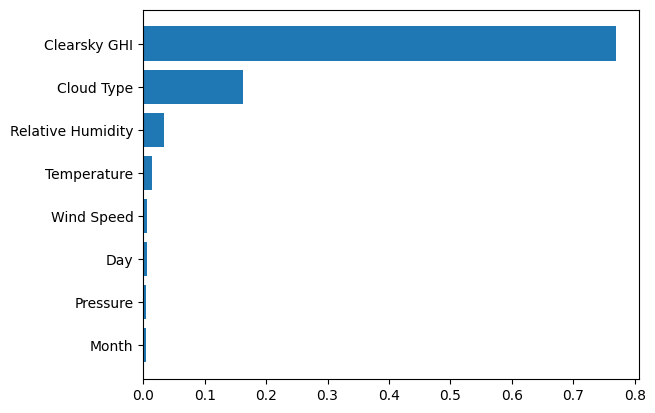

In [25]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

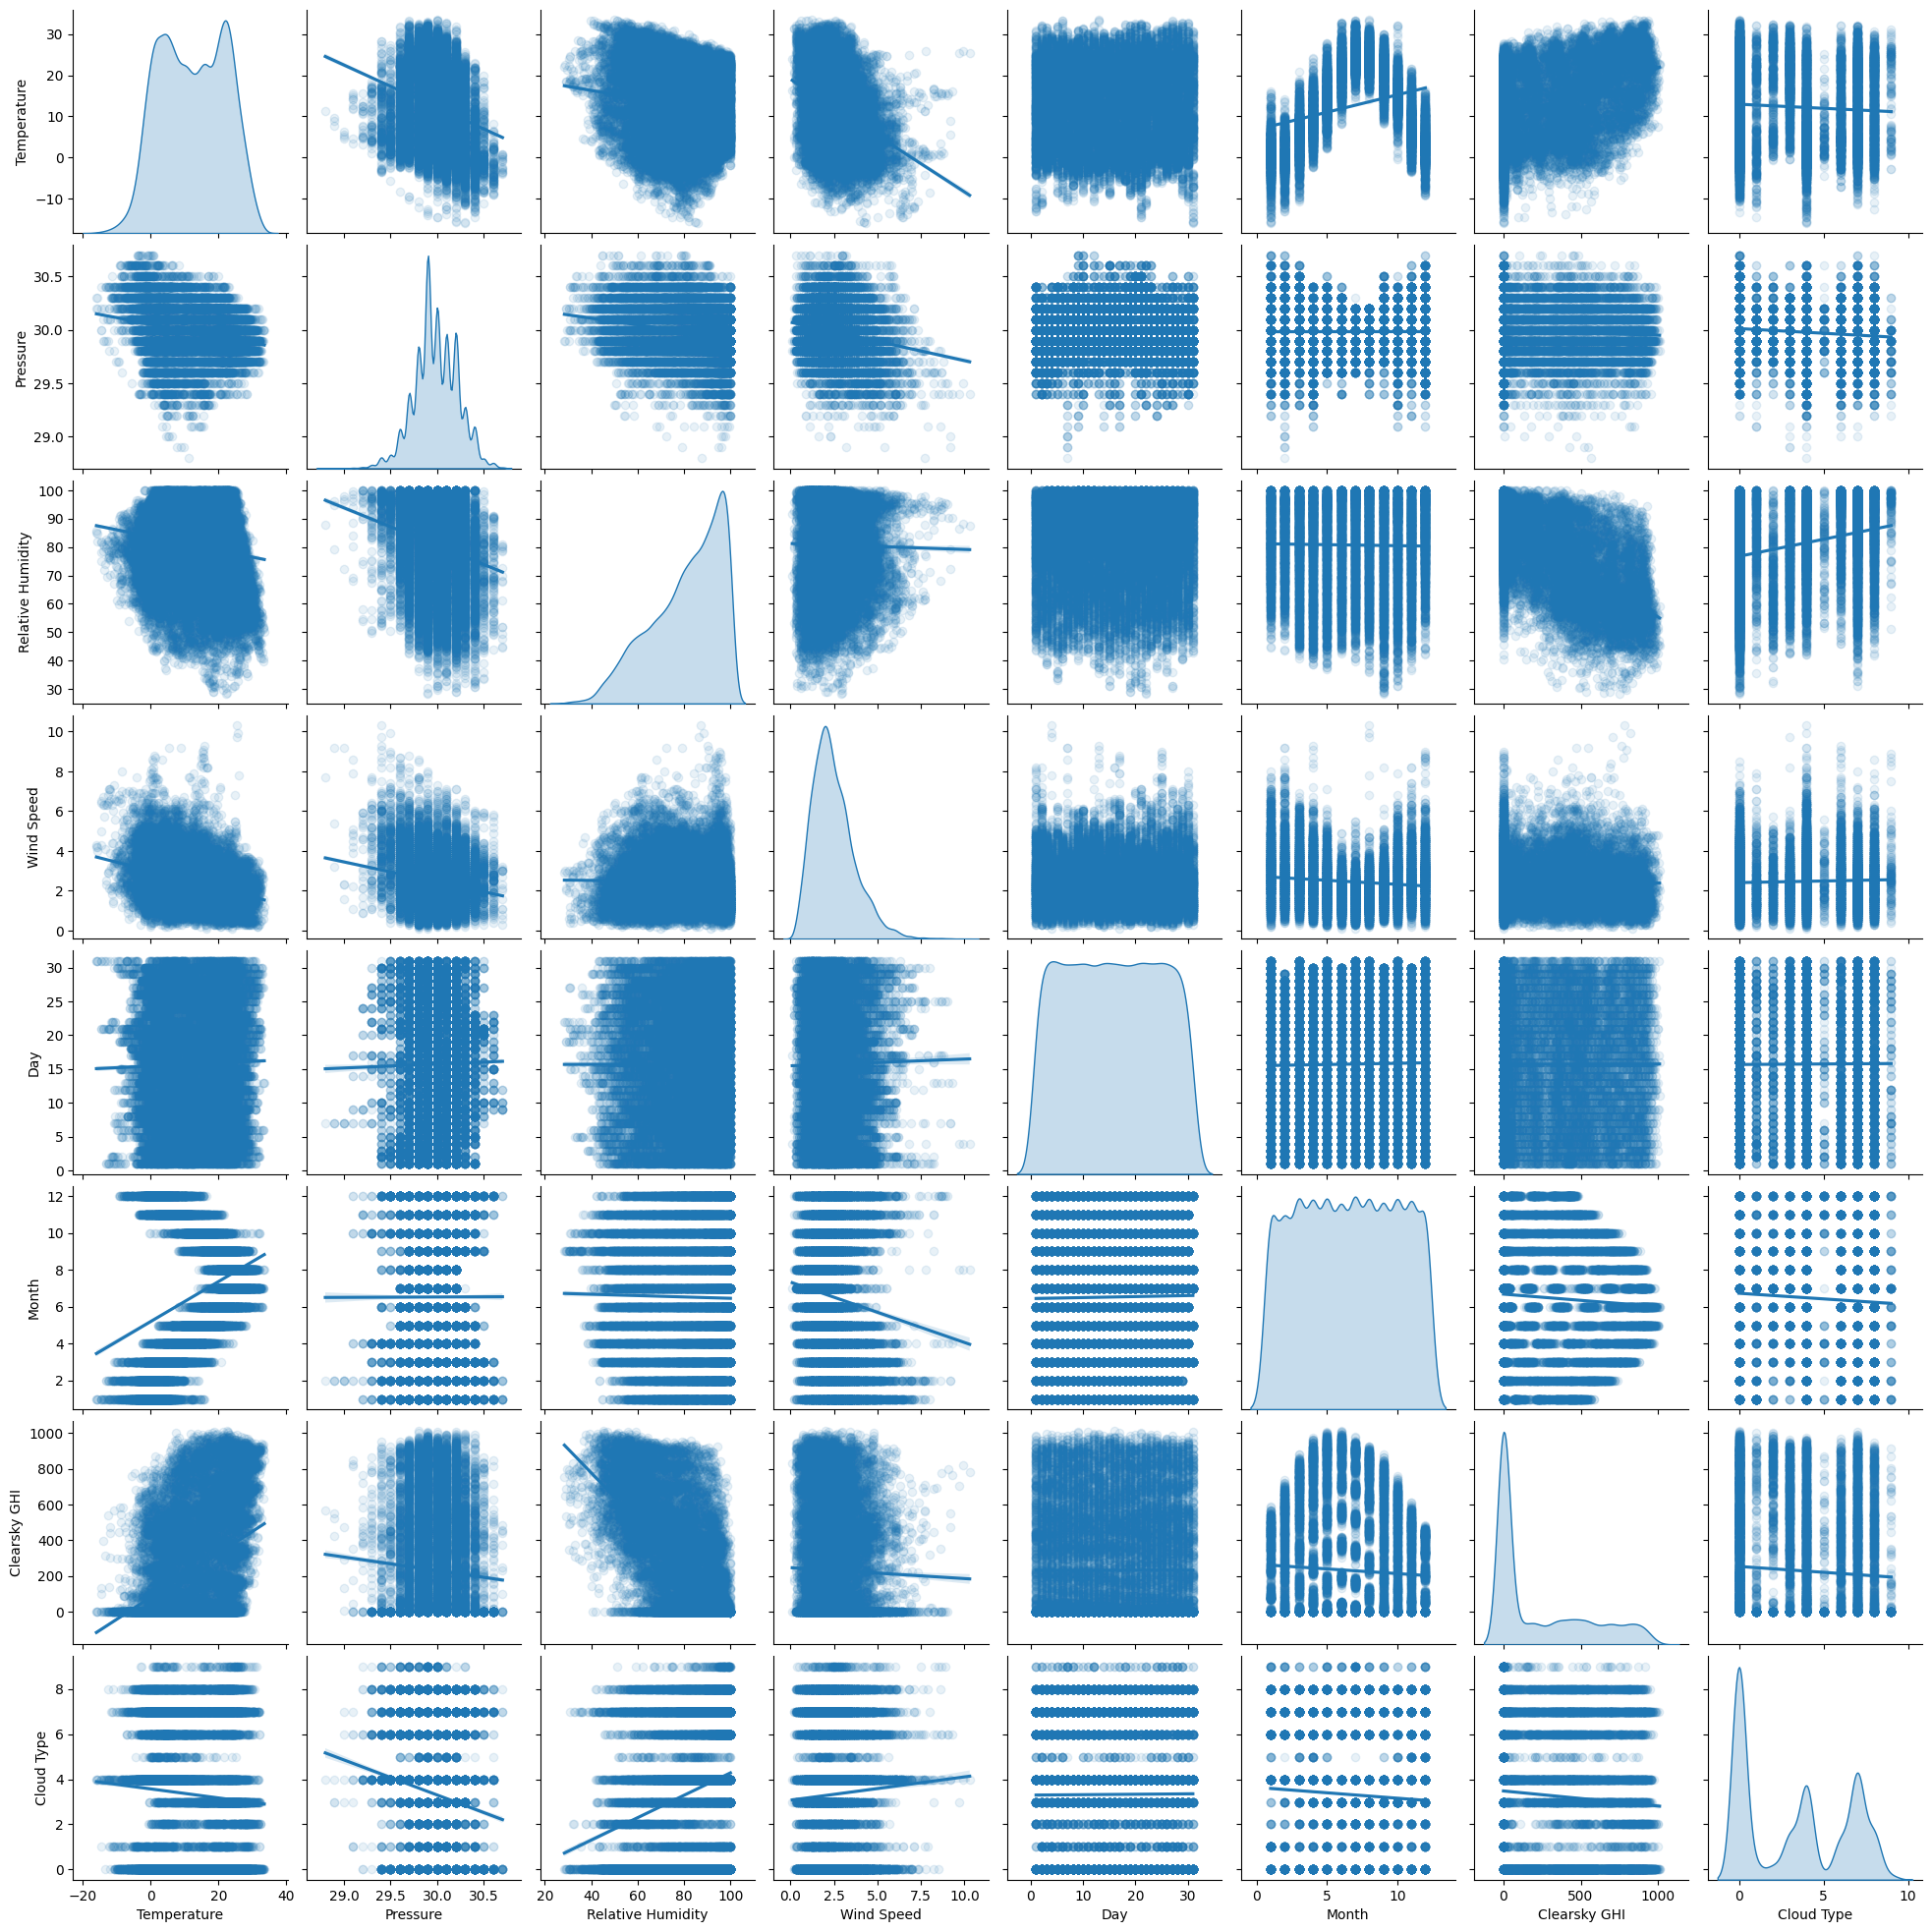

In [26]:
import seaborn as sns

train_dataset = X_train.copy()
train_dataset.insert(0, "GHI", y_train)
_ = sns.pairplot(
    train_dataset[['Temperature', 'Pressure', 'Relative Humidity', 'Wind Speed', 'Day', 'Month','Clearsky GHI','Cloud Type']],
    kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.1}})

In [30]:
from tensorflow.keras.layers import LSTM

In [31]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(InputLayer((24,10)))
model2.add(LSTM(50))
model2.add(Dense(50,'relu'))
model2.add(Dense(10,'relu'))
model2.add(Dense(1,'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                12200     
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 15271 (59.65 KB)
Trainable params: 15271 (59.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
cp = ModelCheckpoint('model2/',save_best_only =True)
model2.compile(loss = MeanSquaredError() , optimizer = Adam(learning_rate = 0.0001), metrics = RootMeanSquaredError()) 

In [33]:
from sklearn.metrics import r2_score
print('Average R2:', crs.mean())
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))

Average R2: 0.9497740406367772
MAE: 20.21891119221411
RMSE: 49.56116056292752
